# Herkenning van handgeschreven cijfers met Machine Learning

## k-Nearest Neigbours

Stijn Oomes

donderdag 15 september 2022


## info KNN
- K-Nearest Neighbors (kNN) is een eenvoudige en intuïtieve methode voor classificatie. Het werkt door een onbekend datapunt te classificeren op basis van de klasse van de k dichtstbijzijnde datapunten in de trainingsset. De fouten die kNN maakt, worden meestal veroorzaakt door ruis of onbalans in de trainingsset.


## Importeer libraries

In [53]:
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from keras.datasets import mnist

## Verover de data

In [54]:
(X_train_images, y_train_labels), (X_test_images, y_test_labels) = mnist.load_data()

In [55]:
X_train_images.shape

(60000, 28, 28)

In [56]:
y_train_labels.shape

(60000,)

Hier check ik hoeveel unieke labels er zijn, en ik check of het voldoet aan mijn verwachting.

In [57]:
np.unique(y_train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

En nog een check of de test-set aan mijn verwachtingen voldoet.

In [58]:
X_test_images.shape

(10000, 28, 28)

In [59]:
y_test_labels.shape

(10000,)

In [60]:
print(y_train_labels[:20])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


## Toon 12 random cijfers uit de training-set

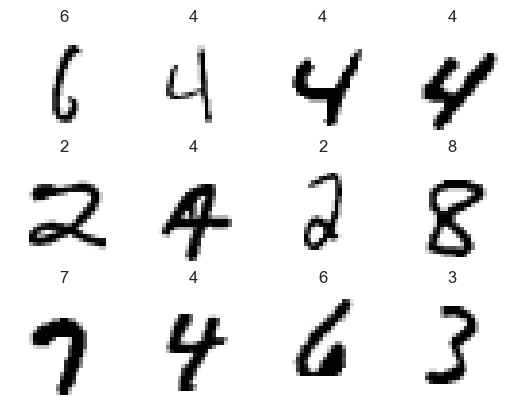

In [61]:
for sub in range(1, 13):
        plt.subplot(3,4, sub)
        i = np.random.randint(60000)

        plt.imshow(255 - X_train_images[i], cmap='gray')
        plt.title(y_train_labels[i]);
        plt.axis("off")

## Maak de images geschikt voor ML modellen

**OPDRACHT**: "reshape" de images naar een nieuwe data structuur met dimensies (#aantal_images, 28*28)

In [62]:
X_train_images_flatten = X_train_images.reshape((60000,28*28))


In [63]:
X_train_images_flatten.shape

(60000, 784)

In [64]:
X_test_images_flatten = X_test_images.reshape((10000,28*28))


In [65]:
X_test_images_flatten.shape

(10000, 784)

## k-Nearest Neighbours


Het is beter om in eerste instantie slechts een **deel** van de training set en de test set te gebruiken, bijvoorbeeld 10%.

Het trainen duurt niet lang, maar het voorspellen kan zeer rekenintensief zijn.

Gebruik %%timeit om deze bewering te controleren.

In [66]:
from sklearn.model_selection import train_test_split

knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')

**OPDRACHT**: train de kNN met fit() en pas het model toe met predict(). *Kies eerst 10% van de train set en test set.* Je mag dat later verruimen.

In [67]:
%%timeit
knn.fit(X_train_images_flatten[:6000,:], y_train_labels[:6000])


182 µs ± 2.6 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [68]:
%%timeit
y_predicted_labels = knn.predict(X_test_images_flatten[:1000,:])
print(accuracy_score(y_test_labels[:1000], y_predicted_labels[:1000]))


0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
103 ms ± 924 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


**OPDRACHT**: Hoe verhoudt de "training-tijd" zich tot de "test-tijd"?

In [69]:
#train tijd:185 µs
#test tijd: 103 ms

Herhaal hier even dezelfde code omdat variabelen binnen de %%timeit niet toegankelijk zijn buiten de %%timeit.

In [70]:
y_predicted_labels = knn.predict(X_test_images_flatten[:6000,:])

print(accuracy_score(y_test_labels[:6000], y_predicted_labels[:6000]))

0.9215


Bepaal een verwarringsmatrix en plot deze matrix als heatmap.

In [71]:
cm = confusion_matrix(y_test_labels[:1000], y_predicted_labels[:1000])

print(cm)

[[ 83   0   0   0   0   0   2   0   0   0]
 [  0 126   0   0   0   0   0   0   0   0]
 [  2   4  98   0   1   0   2   7   2   0]
 [  0   1   0  98   0   2   2   2   0   2]
 [  0   2   0   0  98   0   1   1   0   8]
 [  1   1   0   0   1  81   0   0   2   1]
 [  2   0   0   0   1   0  84   0   0   0]
 [  0   6   0   0   1   1   0  89   0   2]
 [  2   1   0   4   1   1   2   0  74   4]
 [  0   0   0   0   2   0   0   2   2  88]]


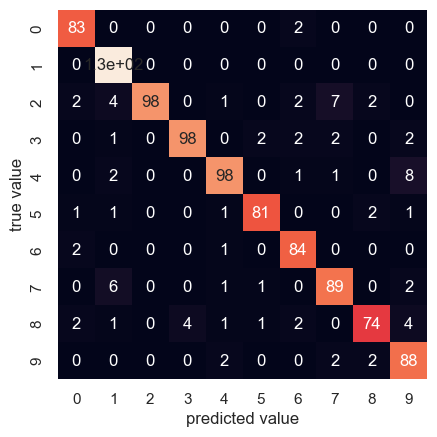

In [72]:
sns.heatmap(cm, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

Wat valt je op?
het valt mij op dat de waarde 0, 5 en 8 erg vaak fout worden gedaan. Ze hebben een lage percentage. De 9 en 4 worden het vaakst door elkaar gehaald.

## Toon 12 voorbeelden van fouten van het model

Ik bepaal eerst welke cijfers fout zijn gecategoriseerd.

In [73]:
mistakes =  y_test_labels[:1000]!=y_predicted_labels[:1000]

Ik bekijk een aantal voorbeelden.

In [74]:
mistakes[:100]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False])

En bepaal hoeveel fouten er zijn:

In [75]:
# keepdims: bool | None = False) -> int
np.count_nonzero(mistakes)

81

Ik wil hier alleen de fout gecategoriseerde cijfers plotten.

Op dit moment worden in de code hieronder 12 willekeurige cijfers uit de *hele* test set gekozen.

**OPDRACHT**: schrijf de code om naar alleen **fout** geclassificeerde cijfers.

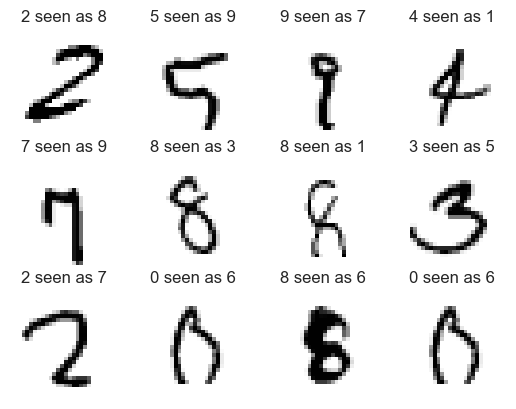

In [76]:
#for loops 12 times to make 12 subplots
for sub in range(1,13):
    plt.subplot(3,4, sub)
    #while loop is active until predicted_number!=actual_number, because of break
    while True:
        i = np.random.randint(1000)
        predicted_number = y_predicted_labels[i]
        actual_number = y_test_labels[i]
        if predicted_number!=actual_number:
            plt.imshow(255 - X_test_images[i,:,:], cmap='gray')
            plt.axis("off")
            plt.title('{0} seen as {1}'.format(actual_number, predicted_number))
            break